# Seaborn

In [36]:
import seaborn as sns

%matplotlib inline

In [37]:
# practice with seaborn built in data set 
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


------

# 1) Distributions Plot
- distplot
- jointplot
- pairplot
- rugplot
- kdeplot

## displot (univariate data)

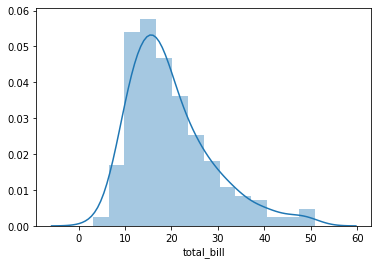

In [5]:
sns.distplot(tips["total_bill"]);

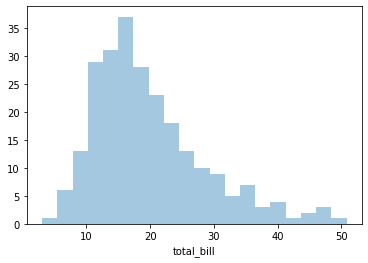

In [11]:
#using kde, it will truns into histogram
sns.distplot(tips["total_bill"], kde=False, bins = 20);

------

## jointplot (bi-virate data)

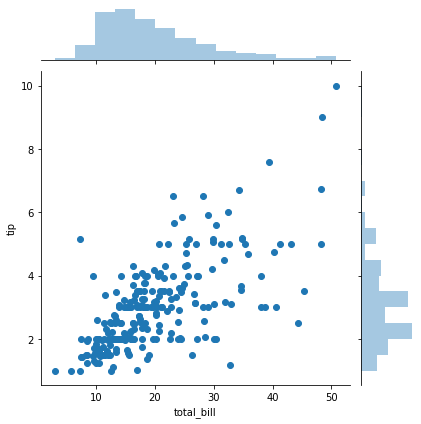

In [20]:
sns.jointplot(x = tips["total_bill"], y =tips["tip"] , data = tips);

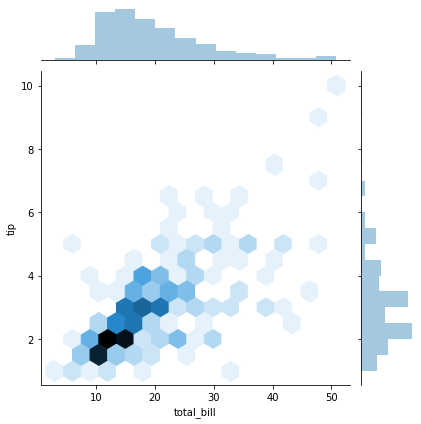

In [17]:
sns.jointplot(x = tips["total_bill"], y =tips["tip"] , data = tips, kind="hex");

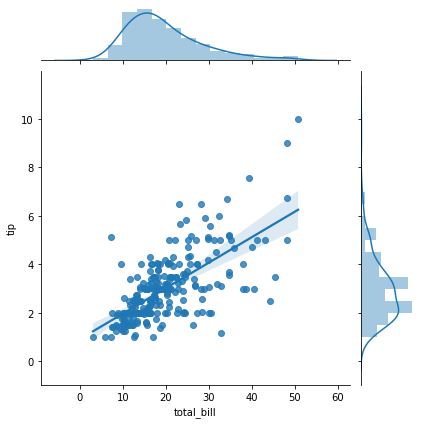

In [19]:
sns.jointplot(x=tips["total_bill"],y=tips["tip"],data=tips, kind = "reg");

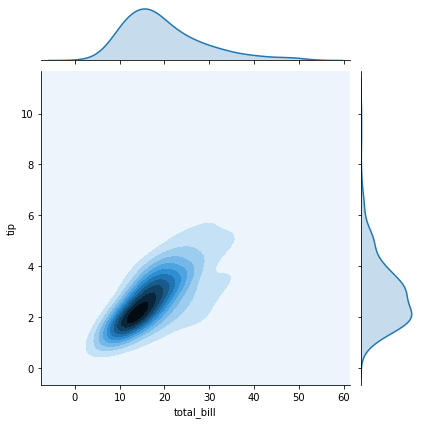

In [21]:
sns.jointplot(x= tips["total_bill"], y= tips["tip"], data = tips, kind = "kde");

-------

## Pairplot
- automatically create for numerical values

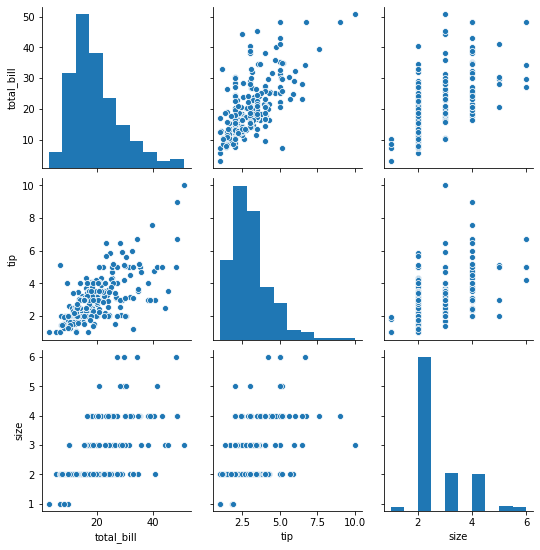

In [22]:
sns.pairplot(tips);

- `hue` can be used for categorical values

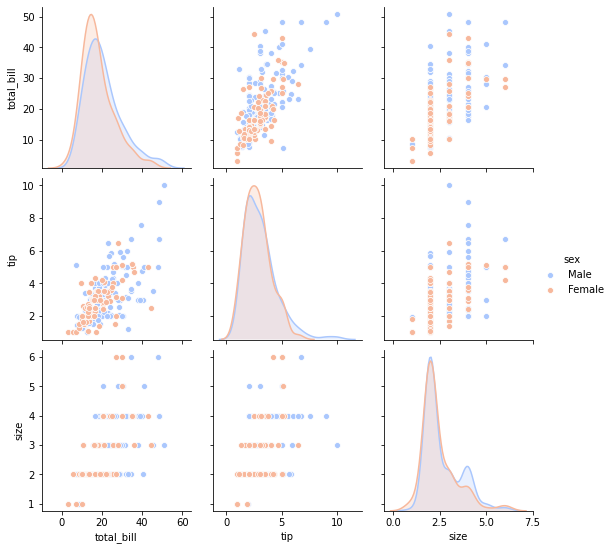

In [27]:
sns.pairplot(tips, hue="sex", palette = "coolwarm");

## kdeplot

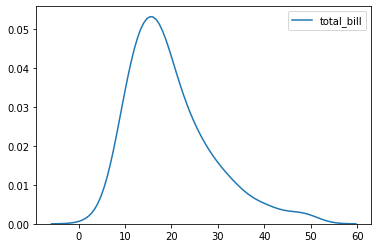

In [38]:
sns.kdeplot(tips["total_bill"]);

-----------

# 2) Categorical Plots

- factorplot
- boxplot
- violinplot
- stripplot
- swarmplot
- barplot
- countplot

In [40]:
import seaborn as sns
%matplotlib inline

In [41]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot

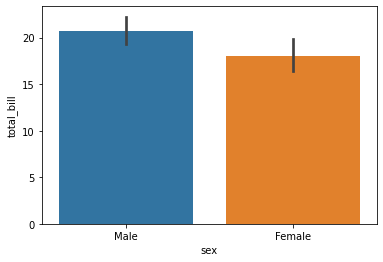

In [43]:
sns.barplot(x = tips["sex"], y = tips["total_bill"], data=tips);
#this will show the average total bill per sex

In [44]:
import numpy as np

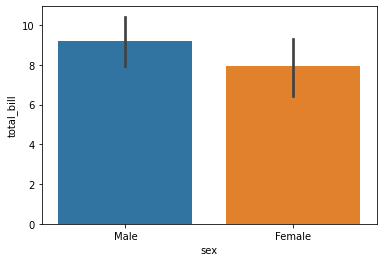

In [47]:
#we can use different estimator , example: std deviation
# it is like group by
sns.barplot(x = tips["sex"], y = tips["total_bill"], data=tips, estimator = np.std);

## countplot

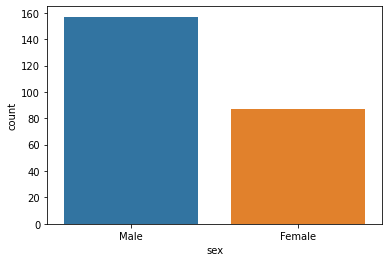

In [50]:
#explicitly counting the number of specific categorial data type
sns.countplot(x=tips["sex"], data = tips);

## boxplot

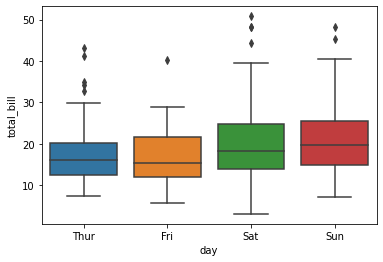

In [51]:
sns.boxplot(x=tips["day"], y=tips["total_bill"], data= tips);

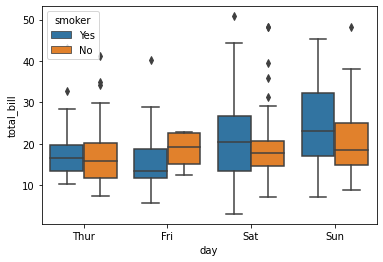

In [52]:
sns.boxplot(x=tips["day"], y=tips["total_bill"], data= tips, hue=tips["smoker"]);

## violinplot

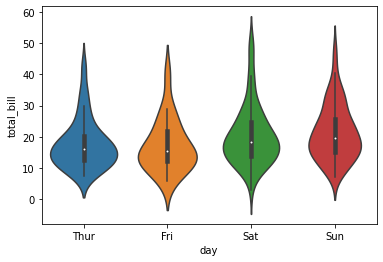

In [54]:
sns.violinplot(x= tips["day"], y= tips["total_bill"], data=tips);

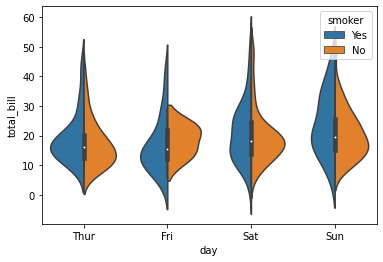

In [56]:
sns.violinplot(x= tips["day"], y= tips["total_bill"], data=tips, hue=tips["smoker"], split=True);

## stripplot

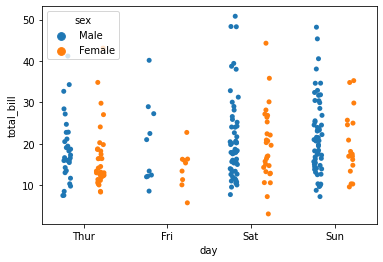

In [60]:
sns.stripplot(x="day", y = "total_bill", data = tips, hue="sex", dodge = True);

## swarmplot
- it is kind of like violin plot + stripplot
- avoid for large data sets

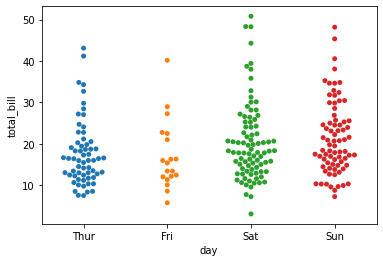

In [62]:
sns.swarmplot(x="day", y ="total_bill", data = tips);
#it shows every data points

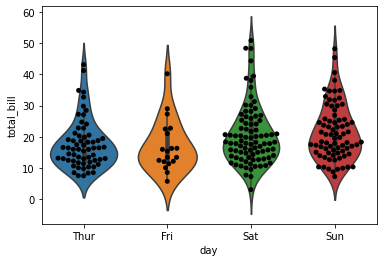

In [63]:
sns.violinplot(x="day", y ="total_bill", data = tips)
sns.swarmplot(x="day", y ="total_bill", data = tips, color = "black");

## factorplot
- Generic way of plotting above plots

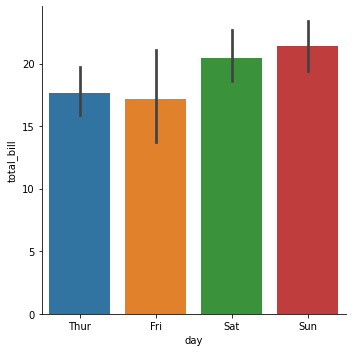

In [66]:
sns.factorplot(x = "day", y = "total_bill", data = tips, kind="bar");

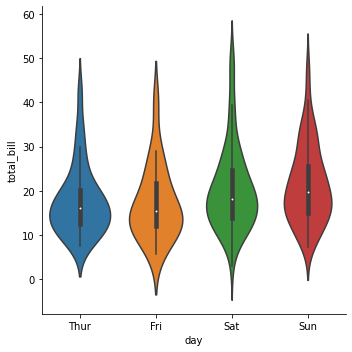

In [67]:
sns.factorplot(x = "day", y = "total_bill", data = tips, kind="violin");

---------

# 3) Matrix Plots

In [68]:
import seaborn as sns
%matplotlib inline

In [69]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

- to use heatmap, the data needs to be in `matrix form`
- There are 2 ways to do this.
    - 1) finding the correlation
    - 2) piviot the data

In [76]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


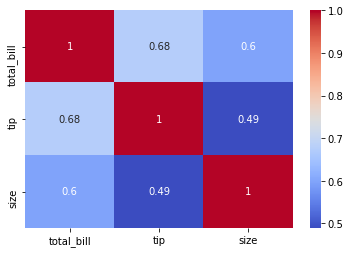

In [80]:
sns.heatmap(tc, annot=True, cmap = "coolwarm");

In [81]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [93]:
fp = flights.pivot_table(index = "month", columns = "year", values= "passengers")
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


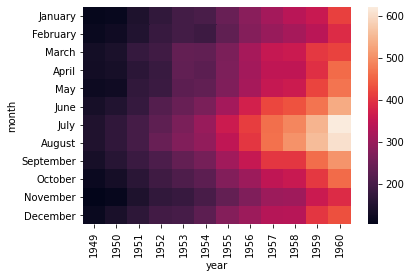

In [96]:
sns.heatmap(fp);

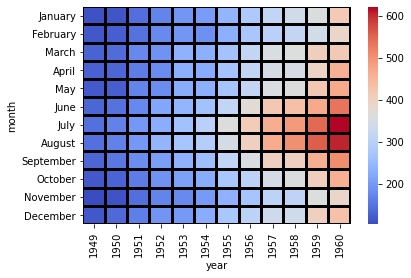

In [95]:
sns.heatmap(fp, cmap = "coolwarm", linecolor="black", linewidth=2);

## clustermap

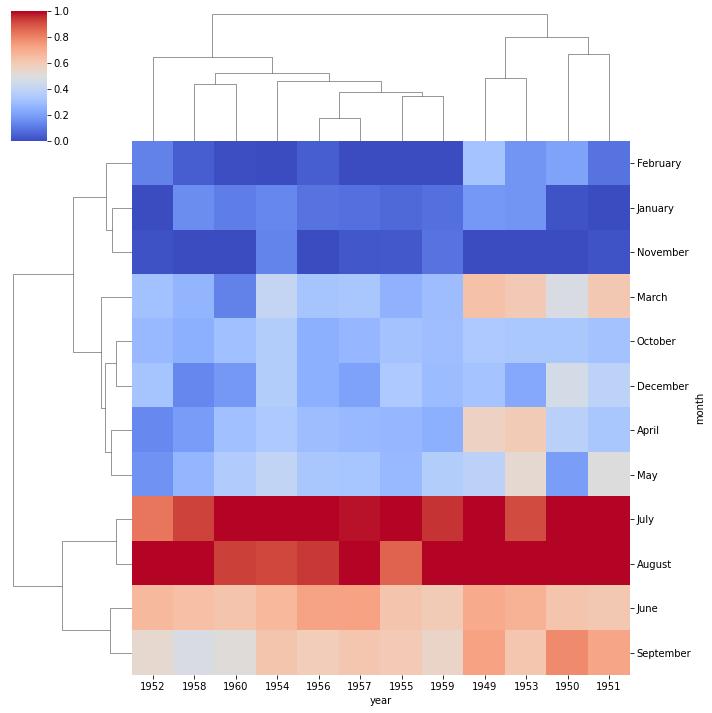

In [101]:
sns.clustermap(fp, cmap = "coolwarm", standard_scale = 1);

----------

# 4) Grids

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [116]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [118]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

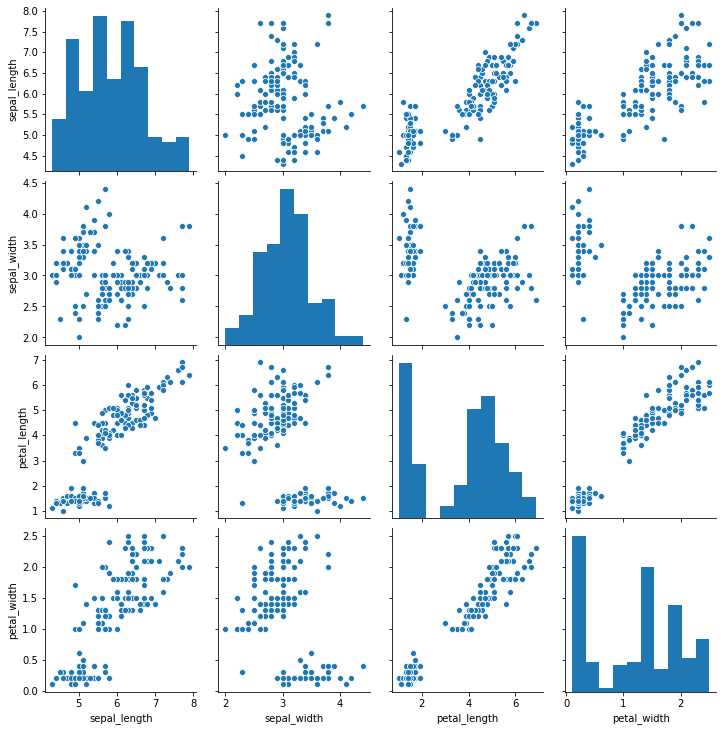

In [119]:
sns.pairplot(iris);

## PairGrid

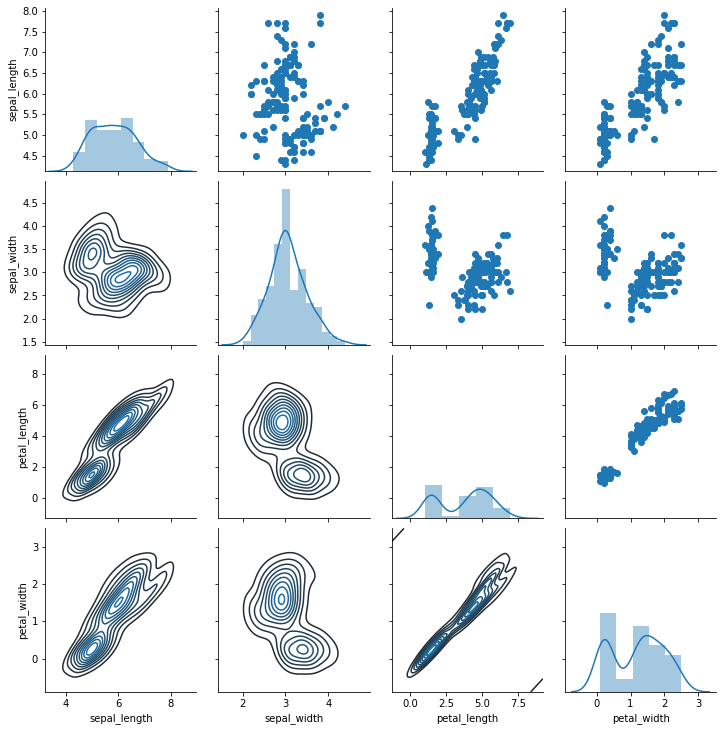

In [120]:
g = sns.PairGrid(iris); #create empty grid

g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

--------

In [121]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## FacetGrid

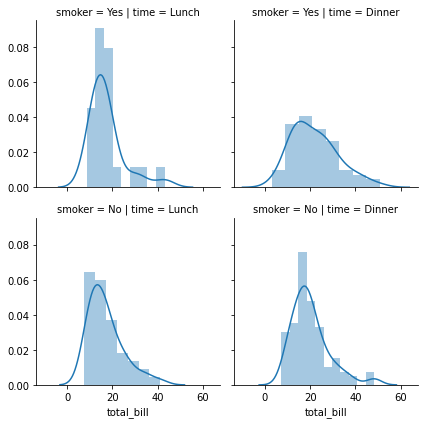

In [123]:
g = sns.FacetGrid(data = tips, col = "time", row = "smoker")

g.map(sns.distplot, "total_bill");

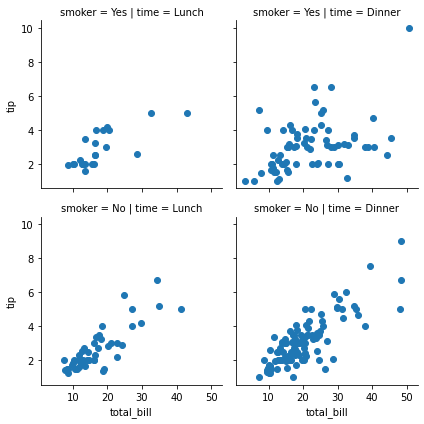

In [124]:
g = sns.FacetGrid(data = tips, col = "time", row = "smoker")

g.map(plt.scatter, "total_bill", "tip");

---------

# 5) Regression Plots

In [125]:
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot (linear plot)

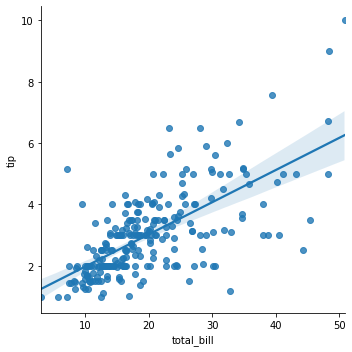

In [128]:
sns.lmplot(x = "total_bill", y = "tip", data = tips);

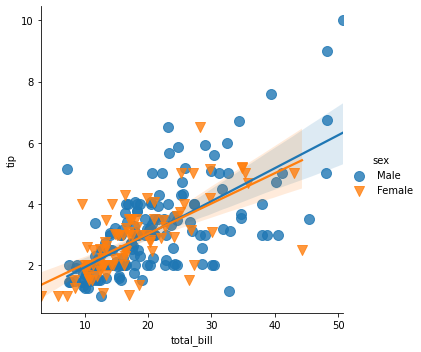

In [134]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", markers = ["o", "v"], scatter_kws={"s":100});

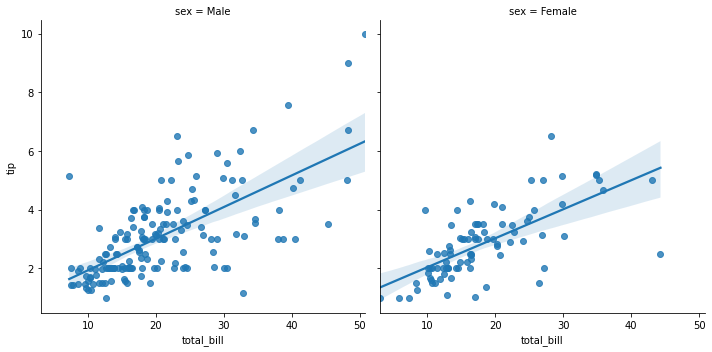

In [135]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, col = "sex");

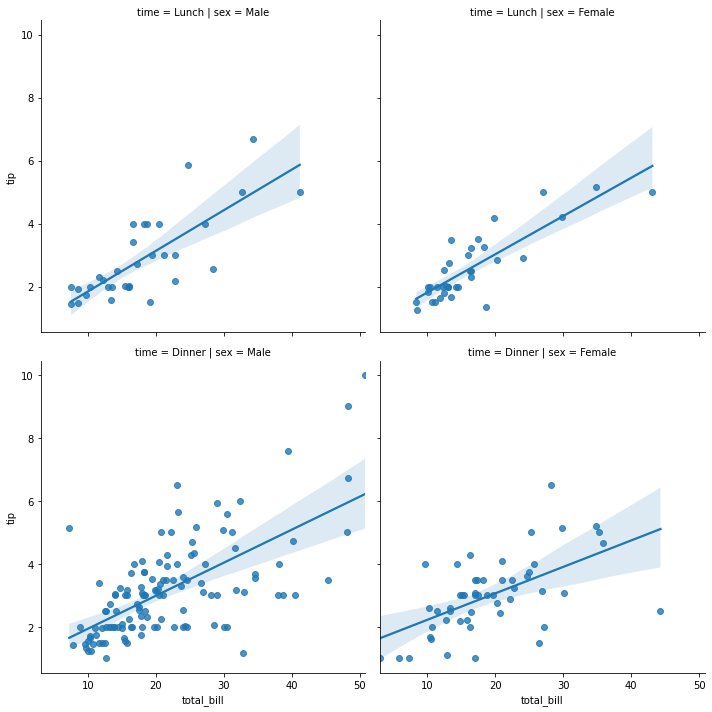

In [136]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, col = "sex", row = "time");

-------

# 6) Style and Color

In [137]:
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


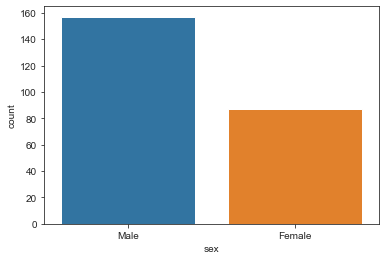

In [148]:
sns.countplot("sex", data = tips);

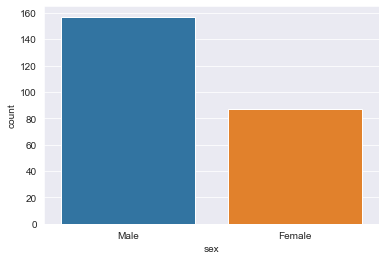

In [153]:
sns.set_style("darkgrid")
sns.despine(left = True, right = True);
sns.countplot("sex", data = tips);

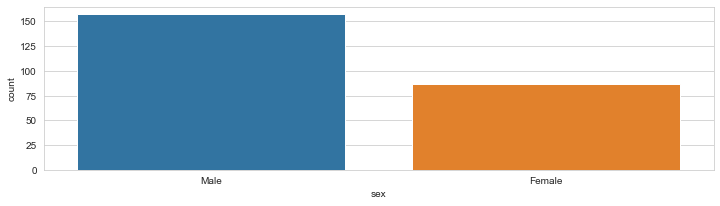

In [155]:
plt.figure(figsize = (12,3))
sns.set_style("whitegrid")
sns.countplot("sex", data = tips);

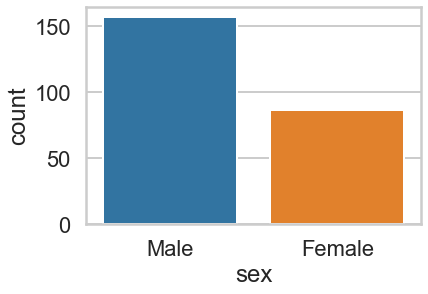

In [158]:
sns.set_context("poster", font_scale=1)
sns.countplot("sex", data = tips);

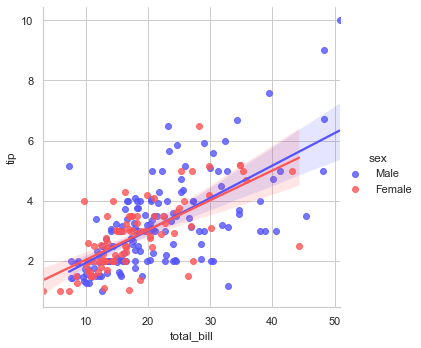

In [161]:
sns.set_context("notebook", font_scale=1)

sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", palette = "seismic");